### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')
library(ggplot2)
library(devtools)
library(lubridate)
library(rlang)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘rlang’

The following objects are masked from ‘package:devtools’:

    ns_env, pkg_env, with_options



In [74]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [75]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [76]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


What is the most common month of travel?

[1] "factor"

[1] "POSIXct" "POSIXt"

months
  Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
 5745  6364  5820 10661 12180 14000     0     0     0     0     0     0 

                 Min.               1st Qu.                Median 
"2017-01-01 00:17:01" "2017-03-07 18:47:48" "2017-04-28 12:04:49" 
                 Mean               3rd Qu.                  Max. 
"2017-04-19 05:14:05" "2017-06-01 16:46:03" "2017-06-30 23:52:44" 

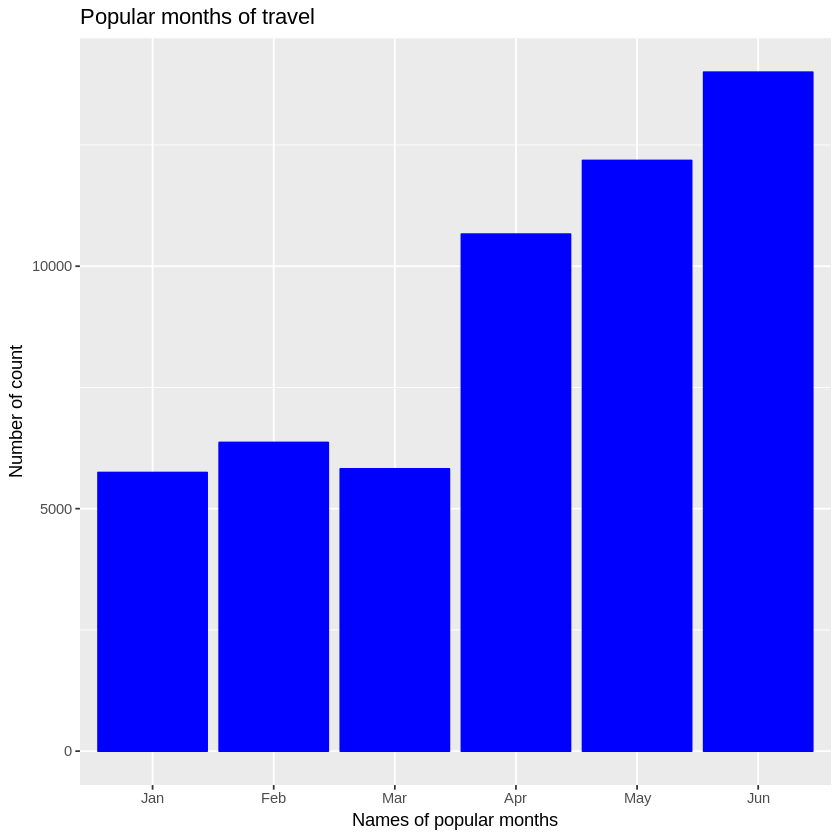

In [8]:
#New York
ny$Date <- ymd_hms(ny$Start.Time)
class(ny$Start.Time)

#new date
ny$Date2 <- ymd_hms(ny$Start.Time)
class(ny$Date2)

#information about the data.
months <- month(ny$Date, label=TRUE)
table(months)
sort(table(months), decreasing=TRUE)[1]

#data visualization
bargraph<- function(mydata)
    {
ggplot(mydata, aes(x= months))+
geom_bar(color='blue', fill='#0000FF')+
ggtitle('Popular months of travel')+
xlab("Names of popular months") +
ylab("Number of count")
}
bargraph(ny)

#summary
summary(ny$Date)

[1] "factor"

[1] "POSIXct" "POSIXt"

months
  Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
 8946 11563 12612 18522 17072 20335     0     0     0     0     0     0 

Jun 
20335

                 Min.               1st Qu.                Median 
"2017-01-01 00:11:00" "2017-03-05 18:34:00" "2017-04-18 07:44:18" 
                 Mean               3rd Qu.                  Max. 
"2017-04-15 00:41:22" "2017-05-28 09:41:00" "2017-06-30 12:55:16" 
                 NA's 
                  "1" 

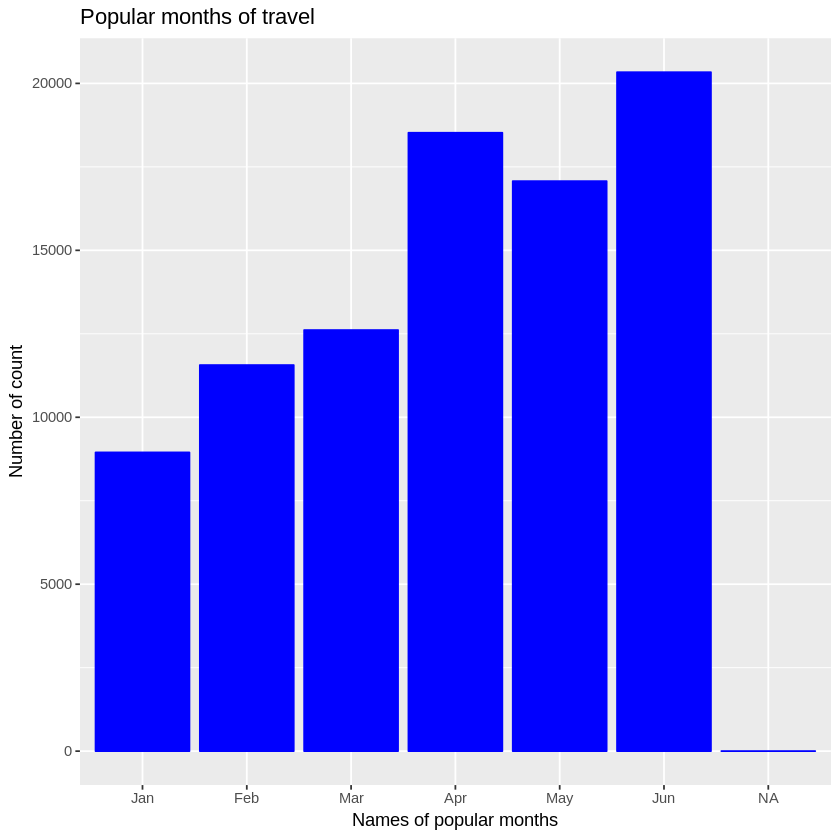

In [9]:
#Washington,DC
wash$Date <- ymd_hms(wash$Start.Time)
class(wash$Start.Time)

#new date
wash$Date2 <- ymd_hms(wash$Start.Time)
class(wash$Date2)

#information about the data.
months <- month(wash$Date, label=TRUE)
table(months)
sort(table(months), decreasing=TRUE)[1]

#data visualization
bargraph(wash)

#summary
summary(wash$Date)


[1] "factor"

[1] "NULL"

months
 Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec 
 650  930  803 1526 1905 2816    0    0    0    0    0    0 

                 Min.               1st Qu.                Median 
"2017-01-01 00:40:14" "2017-03-23 15:23:37" "2017-05-09 18:50:53" 
                 Mean               3rd Qu.                  Max. 
"2017-04-27 10:12:04" "2017-06-08 11:08:41" "2017-06-30 23:10:48" 

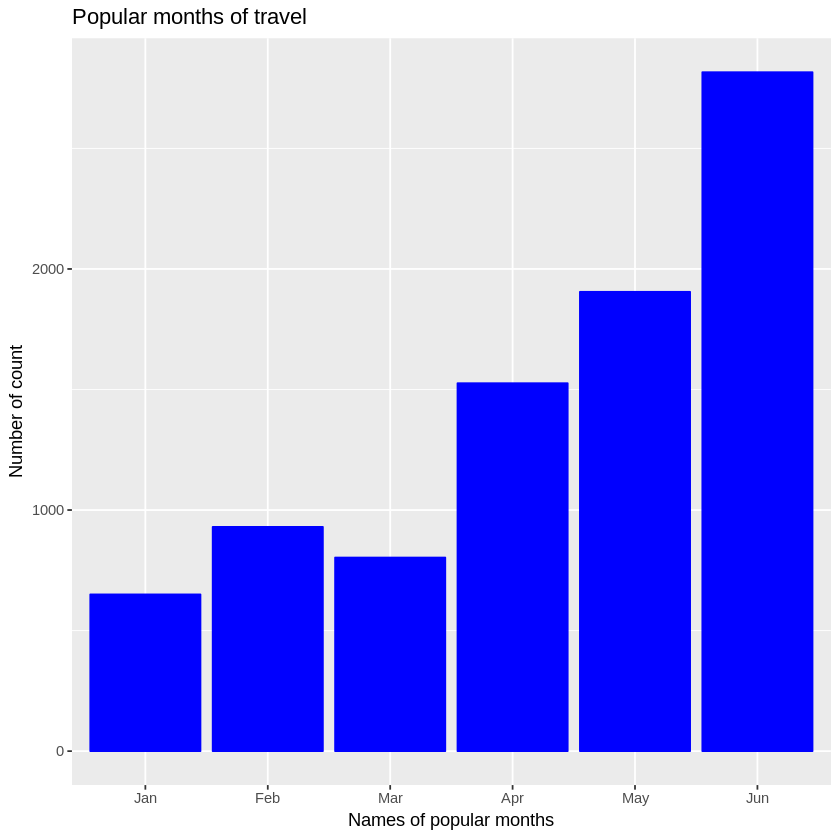

In [94]:
#Chicago
chi$Date <- ymd_hms(chi$Start.Time)
class(chi$Start.Time)

#new date
chi$Date2 <- ymd_hms(chi$Start.Time)
class(wash$Date2)

#information about the data.
months <- month(chi$Date, label=TRUE)
table(months)
sort(table(months), decreasing=TRUE)[1]

#data visualization
bargraph(chi)

#summary
summary(chi$Date)


New York: Jun 1400
Washington,DC: June 20335
Chicago: June 2816

June is the common month in which there is a higher bike share.

### Question 2

What is the most common day of the week?

[1] "factor"

[1] "POSIXct" "POSIXt"

weekday
 Sun  Mon  Tue  Wed  Thu  Fri  Sat 
6597 7570 7898 9632 8729 8168 6176 

                 Min.               1st Qu.                Median 
"2017-01-01 00:17:01" "2017-03-07 18:47:48" "2017-04-28 12:04:49" 
                 Mean               3rd Qu.                  Max. 
"2017-04-19 05:14:05" "2017-06-01 16:46:03" "2017-06-30 23:52:44" 

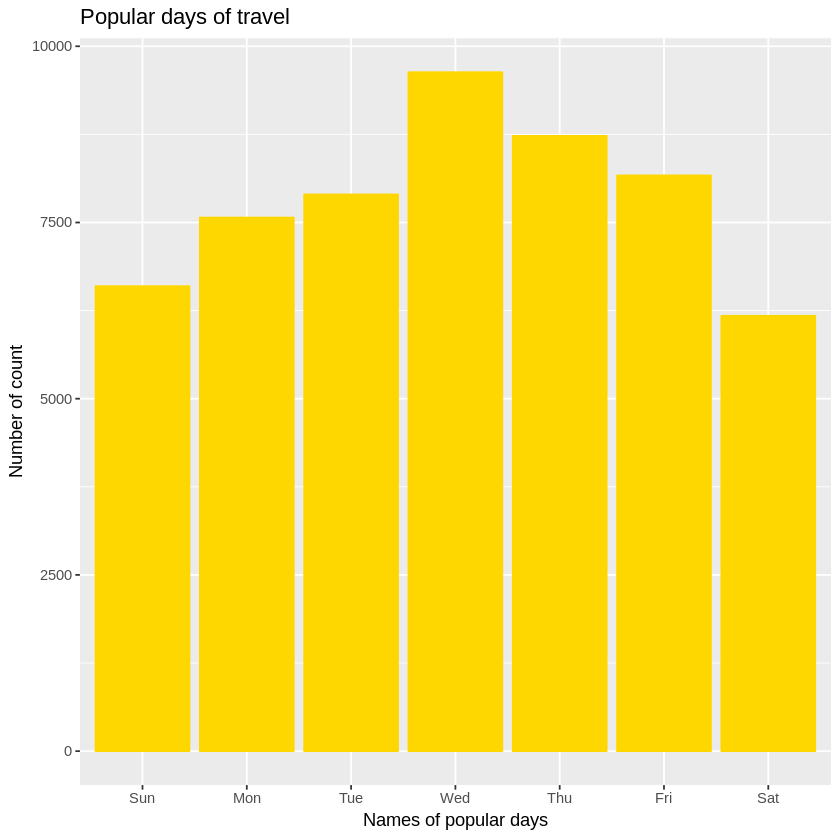

In [10]:
#New York
ny$Date <- ymd_hms(ny$Start.Time)
class(ny$Start.Time)

#new date
ny$Date2 <- ymd_hms(ny$Start.Time)
class(ny$Date2)

#information about the dat
weekday<- wday(ny$Date, label=TRUE)
table(weekday)
sort(table(weekday), decreasing=TRUE)[1]

#data visualization
bargraph <- function(mydata)
    {
ggplot(mydata, aes(x= weekday))+
geom_bar(color='gold', fill='#FFD700')+
ggtitle('Popular days of travel')+
xlab("Names of popular days") +
ylab("Number of count")
}
bargraph(ny)

#summary
summary(ny$Date)

[1] "factor"

[1] "POSIXct" "POSIXt"

weekday
  Sun   Mon   Tue   Wed   Thu   Fri   Sat 
11566 11721 13288 14212 13204 12926 12133 

                 Min.               1st Qu.                Median 
"2017-01-01 00:11:00" "2017-03-05 18:34:00" "2017-04-18 07:44:18" 
                 Mean               3rd Qu.                  Max. 
"2017-04-15 00:41:22" "2017-05-28 09:41:00" "2017-06-30 12:55:16" 
                 NA's 
                  "1" 

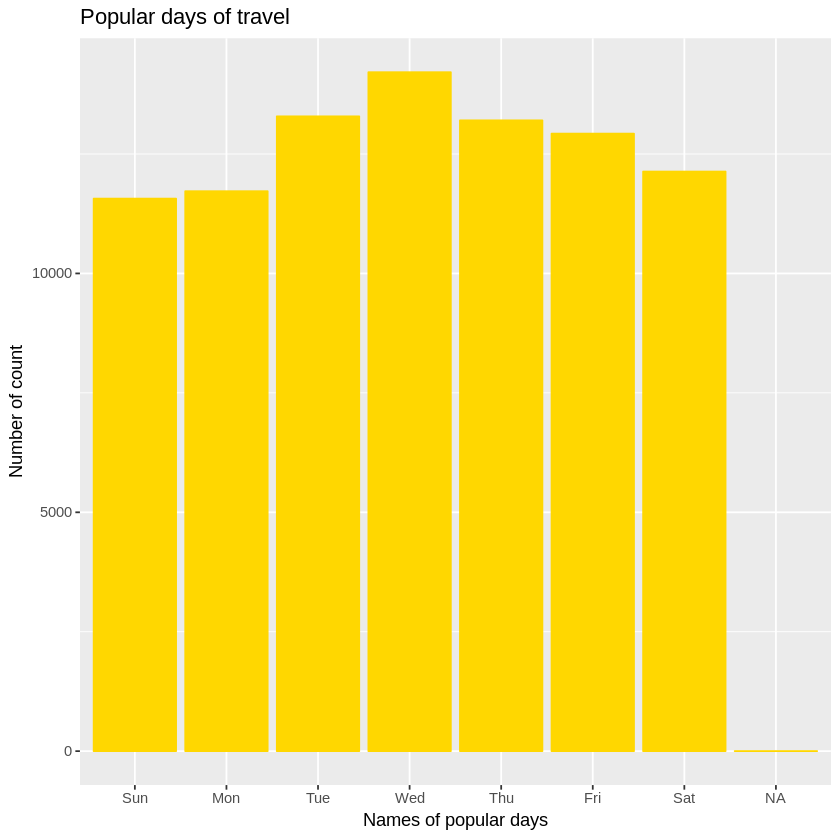

In [97]:
#Washington,DC
wash$Date <- ymd_hms(wash$Start.Time)
class(wash$Start.Time)

#new date
wash$Date2 <- ymd_hms(wash$Start.Time)
class(wash$Date2)

#information about the dat
weekday<- wday(wash$Date, label=TRUE)
table(weekday)
sort(table(weekday), decreasing=TRUE)[1]

#data visualization
bargraph(wash)

#summary
summary(wash$Date)

[1] "factor"

[1] "POSIXct" "POSIXt"

weekday
 Sun  Mon  Tue  Wed  Thu  Fri  Sat 
1111 1302 1292 1236 1254 1285 1150 

                 Min.               1st Qu.                Median 
"2017-01-01 00:40:14" "2017-03-23 15:23:37" "2017-05-09 18:50:53" 
                 Mean               3rd Qu.                  Max. 
"2017-04-27 10:12:04" "2017-06-08 11:08:41" "2017-06-30 23:10:48" 

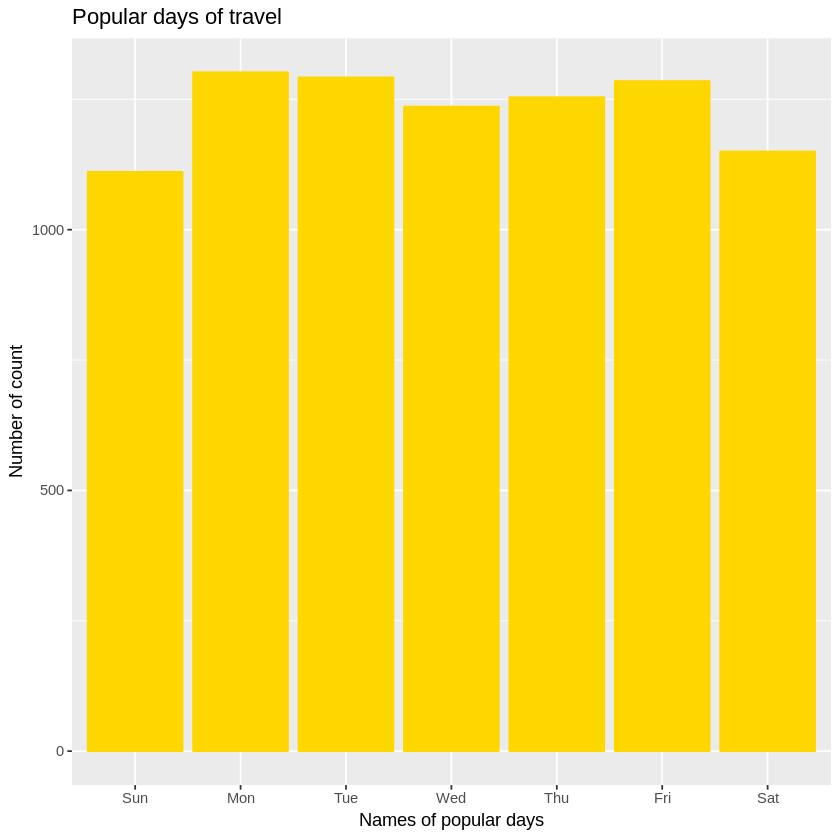

In [98]:
#chicago
chi$Date <- ymd_hms(chi$Start.Time)
class(chi$Start.Time)

#new date
wash$Date2 <- ymd_hms(wash$Start.Time)
class(wash$Date2)

#information about the dat
weekday<- wday(chi$Date, label=TRUE)
table(weekday)
sort(table(weekday), decreasing=TRUE)[1]

#data visualization
bargraph(chi)

#summary
summary(chi$Date)


New York: Wed 9632
Washington,DC: Wed 14212
Chicago: Mon 1302

Wednesday is the most common day in which people hire bikes.

### Question 3

What is the most common hour of the day?

[1] "factor"

[1] "POSIXct" "POSIXt"

hours
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 436  231  152   60   84  312 1212 2512 4337 3521 2471 2643 2866 3054 3157 3356 
  16   17   18   19   20   21   22   23 
3894 5503 5281 3594 2437 1646 1214  797 

                 Min.               1st Qu.                Median 
"2017-01-01 00:17:01" "2017-03-07 18:47:48" "2017-04-28 12:04:49" 
                 Mean               3rd Qu.                  Max. 
"2017-04-19 05:14:05" "2017-06-01 16:46:03" "2017-06-30 23:52:44" 

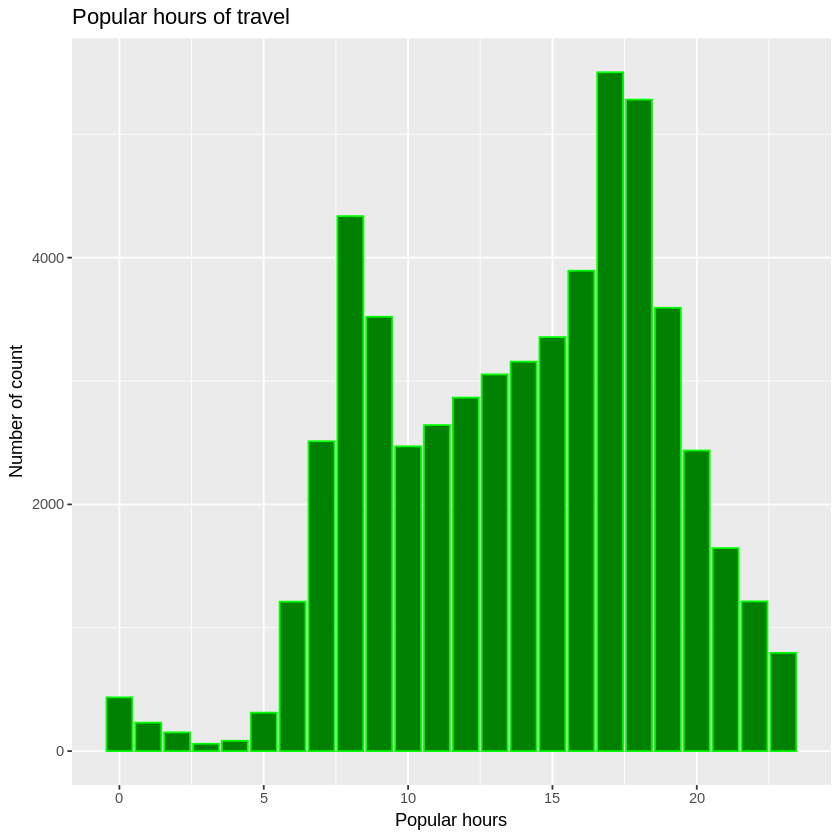

In [99]:
#New York City
ny$Date <- ymd_hms(ny$Start.Time)
class(wash$Start.Time)

#new date
ny$Date2 <- ymd_hms(ny$Start.Time)
class(wash$Date2)

#information about the data
hours<- hour(ny$Date)
table(hours)

#data visualization
bargraph <- function(mydata)
    {
ggplot(mydata, aes(x= hours))+
geom_bar(color='green', fill='#008000')+
ggtitle('Popular hours of travel')+
xlab("Popular hours") +
ylab("Number of count")
}
bargraph(ny)

#summarsummary(ny$Date)
# Your solution code goes here

[1] "factor"

[1] "POSIXct" "POSIXt"

hours
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 227 3500 3421 3655 4541 6741 6994 8490 9805 5957 4788 5057 5569 1906 1774 2136 
  16   17   18   19   20   21   22   23 
2746 3958 3028 1772 1181  855  605  344 

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

                 Min.               1st Qu.                Median 
"2017-01-01 00:11:00" "2017-03-05 18:34:00" "2017-04-18 07:44:18" 
                 Mean               3rd Qu.                  Max. 
"2017-04-15 00:41:22" "2017-05-28 09:41:00" "2017-06-30 12:55:16" 
                 NA's 
                  "1" 

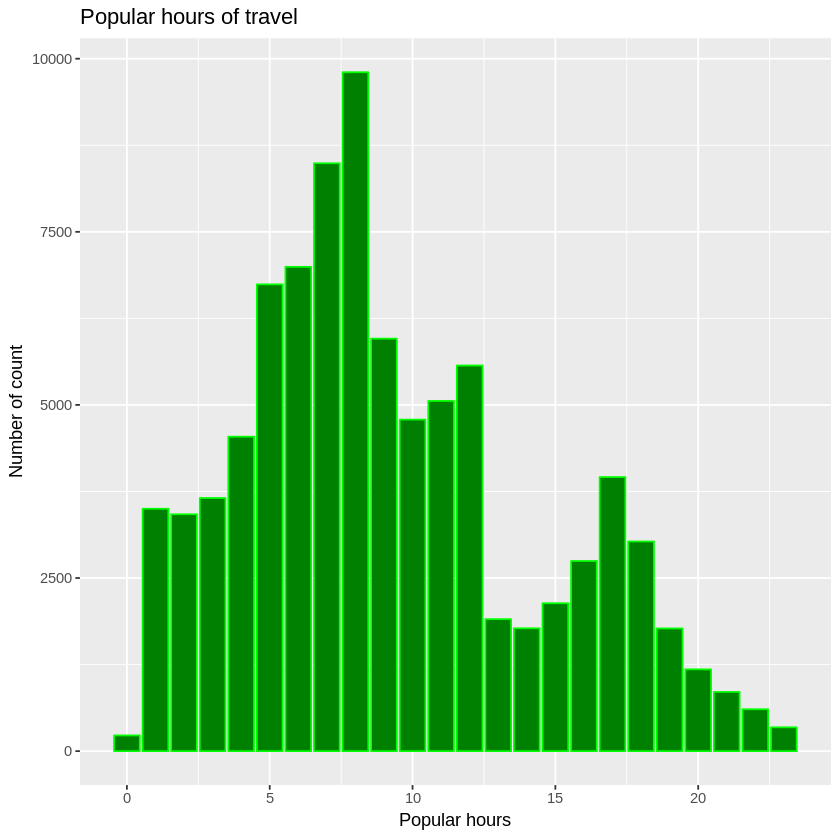

In [101]:
#Washington,DC
wash$Date <- ymd_hms(wash$Start.Time)
class(wash$Start.Time)

#new date
wash$Date2 <- ymd_hms(wash$Start.Time)
class(wash$Date2)

#information about the dat
hours<- hour(wash$Date)
table(hours)

#data visualization
bargraph(wash)

#summary
summary(wash$Date)


[1] "factor"

[1] "POSIXct" "POSIXt"

hours
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
  55   26   18   16   17   67  243  560  693  385  320  467  482  530  466  599 
  16   17   18   19   20   21   22   23 
 804 1039  679  435  268  237  146   78 

                 Min.               1st Qu.                Median 
"2017-01-01 00:40:14" "2017-03-23 15:23:37" "2017-05-09 18:50:53" 
                 Mean               3rd Qu.                  Max. 
"2017-04-27 10:12:04" "2017-06-08 11:08:41" "2017-06-30 23:10:48" 

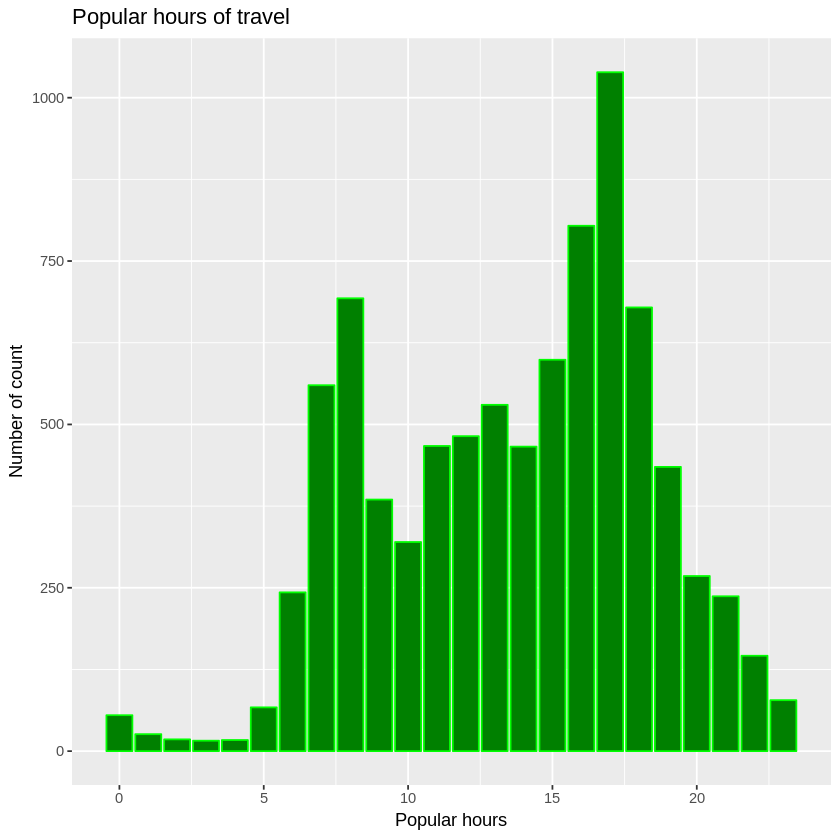

In [102]:
#Chicago
chi$Date <- ymd_hms(chi$Start.Time)
class(chi$Start.Time)

#new date
chi$Date2 <- ymd_hms(chi$Start.Time)
class(wash$Date2)

#information about the dat
hours<- hour(chi$Date)
table(hours)

#data visualization
bargraph(chi)

#summary
summary(chi$Date)

New York: 17:00 55003
Washington,DC: 08:00 9805
Chicago: 17:00 1039

17:00 is the most common hour on which people hire bikes to move around.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [45]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')